In [15]:
import os
import json
from pprint import pprint
import requests
import pandas as pd
import time
from config import api_key, g_key, second_key
import gmaps


In [8]:
#Read in procurement data
filepath = os.path.join("Top_100_Contractors_Report_Fiscal_Year_2019.xls")

In [9]:
procurement_data = pd.read_excel(filepath, sheet_name = None)

In [10]:
print(procurement_data)

{'Federal':                         Global Vendor Name  Number of Actions  \
0              LOCKHEED MARTIN CORPORATION              58430   
1                      BOEING COMPANY, THE              18765   
2             GENERAL DYNAMICS CORPORATION              17136   
3                         RAYTHEON COMPANY              12662   
4             NORTHROP GRUMMAN CORPORATION              12984   
..                                     ...                ...   
95                    GOVERNMENT OF CANADA               2143   
96                    GEO GROUP, INC., THE                379   
97               INSIGHT ENTERPRISES  INC.               1231   
98         UNITEDHEALTH GROUP INCORPORATED                293   
99  WORLD WIDE TECHNOLOGY HOLDING CO., LLC               1842   

    Dollars Obligated  %Total Actions  %Total Dollars  
0        4.866580e+10        0.000777        0.082314  
1        2.808870e+10        0.000250        0.047510  
2        2.096105e+10        0.000228  

In [11]:
#Isolating Spreadsheet for analysis
federal_vendor_names = procurement_data["Federal"][["Global Vendor Name","Number of Actions", "Dollars Obligated"]]
federal_vendor_names = federal_vendor_names.rename({"Global Vendor Name": "Business Name"}, axis = 1)
federal_vendor_names

,Business Name,Number of Actions,Dollars Obligated
0,LOCKHEED MARTIN CORPORATION,58430,4.866580e+10
1,"BOEING COMPANY, THE",18765,2.808870e+10
2,GENERAL DYNAMICS CORPORATION,17136,2.096105e+10
3,RAYTHEON COMPANY,12662,1.635078e+10
4,NORTHROP GRUMMAN CORPORATION,12984,1.610125e+10
...,...,...,...
95,GOVERNMENT OF CANADA,2143,6.115669e+08
96,"GEO GROUP, INC., THE",379,6.073432e+08
97,INSIGHT ENTERPRISES INC.,1231,5.870121e+08
98,UNITEDHEALTH GROUP INCORPORATED,293,5.739703e+08


In [6]:
#creating API for loop to find information regarding procurement companies
url = "https://api.data.gov/sam/v3/registrations?qterms="

businesses = federal_vendor_names["Business Name"]
bus_name = []
address_line_one = []
address_city = []
state = []
zip_code = []
country = []                                    
duns = []
plus_four = []
not_found = []
i = 0

for business in businesses:
    query_url = f"{url}{business[0:6]}&length=500&api_key={api_key}"
    response = requests.get(query_url).json()
    i = i+1
    print(f"I'm looking for {business}, number {i} of 100")
    time.sleep(1)
    for result in response["results"]:
        if business == result["legalBusinessName"].upper():
            bus_name.append(result["legalBusinessName"].upper())
            address_line_one.append(result["samAddress"]["line1"])
            address_city.append(result["samAddress"]["city"])
            state.append(result["samAddress"]["stateOrProvince"])
            zip_code.append(result["samAddress"]["zip"])
            country.append(result["samAddress"]["countryCode"])
            duns.append(result["duns"])
            plus_four.append(result["duns_plus4"])
            print(f"I've added information for request: {business}")
            break



I'm looking for LOCKHEED MARTIN CORPORATION, number 1 of 100
I've added information for request: LOCKHEED MARTIN CORPORATION
I'm looking for BOEING COMPANY, THE, number 2 of 100
I've added information for request: BOEING COMPANY, THE
I'm looking for GENERAL DYNAMICS CORPORATION, number 3 of 100
I'm looking for RAYTHEON COMPANY, number 4 of 100
I've added information for request: RAYTHEON COMPANY
I'm looking for NORTHROP GRUMMAN CORPORATION, number 5 of 100
I've added information for request: NORTHROP GRUMMAN CORPORATION
I'm looking for MCKESSON CORPORATION, number 6 of 100
I've added information for request: MCKESSON CORPORATION
I'm looking for UNITED TECHNOLOGIES CORPORATION, number 7 of 100
I'm looking for HUNTINGTON INGALLS INDUSTRIES, INC., number 8 of 100
I'm looking for LEIDOS HOLDINGS, INC., number 9 of 100
I've added information for request: LEIDOS HOLDINGS, INC.
I'm looking for L3HARRIS TECHNOLOGIES, INC., number 10 of 100
I've added information for request: L3HARRIS TECHNOLOG

In [84]:
#updated api loop with Beta site

second_key = ""

    
businesses = federal_vendor_names["Business Name"]
# bus_name = []
# address_line_one = []
# address_city = []
# state = []
# zip_code = []
# country = []                                    
# duns = []
# plus_four = []
# not_found = []
i = 0

for business in businesses[76:100]:
    if business not in bus_name and len(business.split(" ")) > 1:
        business_search = business.split(" ")[0]+" "+business.split(" ")[1]+" "+business.split(" ")[2].title()
        url_beta = f"https://api.sam.gov/entity-information/v1/entities?api_key={second_key}&dbaName={business_search}"
        response = requests.get(url_beta).json()
        i = i+1
        print(f"I'm looking for {business}, number {i} of 100")
        time.sleep(1)
        for result in response["entityData"]:
            if business == result["entityRegistration"]["legalBusinessName"].upper():
                bus_name.append(result["entityRegistration"]["legalBusinessName"].upper())
                address_line_one.append(result["coreData"]["physicalAddress"]["addressLine1"])
                address_city.append(result["coreData"]["physicalAddress"]["city"])
                state.append(result["coreData"]["physicalAddress"]["stateOrProvinceCode"])
                zip_code.append(result["coreData"]["physicalAddress"]["zipCode"])
                country.append(result["coreData"]["physicalAddress"]["countryCode"])
                print(f"I've added information for request: {business}")
                break


I'm looking for CARAHSOFT TECHNOLOGY CORPORATION, number 1 of 100
I'm looking for SERCO GROUP PLC, number 2 of 100
I'm looking for PATRIOT TEAM, number 3 of 100
I'm looking for CERNER GOVERNMENT SERVICES  INC., number 4 of 100
I'm looking for HENSEL PHELPS CONSTRUCTION CO, number 5 of 100
I'm looking for EMERGENT BIOSOLUTIONS INC., number 6 of 100
I'm looking for NANA REGIONAL CORPORATION, INC., number 7 of 100
I'm looking for CONSORTIUM MANAGEMENT GROUP  INC., number 8 of 100
I'm looking for ROYAL DUTCH SHELL PLC, number 9 of 100
I'm looking for CARDINAL HEALTH  INC., number 10 of 100
I'm looking for BP P.L.C., number 11 of 100
I'm looking for UNISYS CORPORATION, number 12 of 100
I'm looking for CROWLEY HOLDINGS  INC, number 13 of 100
I'm looking for SECURITAS CRITICAL INFRASTRUCTURE SERVICES  INC., number 14 of 100
I'm looking for BROOKHAVEN SCIENCE ASSOCIATES LLC, number 15 of 100
I'm looking for GREAT LAKES DREDGE & DOCK CORPORATION, number 16 of 100
I'm looking for GOVERNMENT OF C

In [7]:
print(len(bus_name))
print(len(address_line_one))
print(len(address_city))
print(len(zip_code))
print(len(country))

30
30
30
30
30


In [86]:
#creating dataframe of results
federal_spending = pd.DataFrame({"Business Name":bus_name, "Address": address_line_one, "City": address_city, "State":state, "Zip":zip_code, "Country": country})
federal_spending = pd.merge(federal_spending, federal_vendor_names, on = "Business Name", how = "left")
federal_spending["Lat"] = ""
federal_spending["Lon"] = ""
federal_spending

,Business Name,Address,City,State,Zip,Country,Number of Actions,Dollars Obligated,Lat,Lon
0,LOCKHEED MARTIN CORPORATION,700 N FREDERICK AVE,GAITHERSBURG,MD,20879,USA,58430,4.866580e+10,,
1,"BOEING COMPANY, THE",3373 BRECKINRIDGE BLVD,RICHARDSON,TX,75082,USA,18765,2.808870e+10,,
2,RAYTHEON COMPANY,5001 US HIGHWAY 30 W,FORT WAYNE,IN,46818,USA,12662,1.635078e+10,,
3,MCKESSON CORPORATION,6555 STATE HIGHWAY 161,IRVING,TX,75039,USA,82167,9.640425e+09,,
4,"LEIDOS HOLDINGS, INC.",1750 PRESIDENTS ST,RESTON,VA,20190,USA,4830,7.272381e+09,,
5,FLUOR CORPORATION,6700 LAS COLINAS BLVD,IRVING,TX,75039,USA,364,5.254247e+09,,
6,BOOZ ALLEN HAMILTON HOLDING CORPORATION,8283 GREENSBORO DR,MCLEAN,VA,22102,USA,5731,5.146754e+09,,
7,JACOBS ENGINEERING GROUP INC.,200 W FORSYTH ST STE 1520,JACKSONVILLE,FL,32202,USA,3630,3.345955e+09,,
8,OSHKOSH CORPORATION,1917 FOUR WHEEL DR,OSHKOSH,WI,54902,USA,13577,2.884559e+09,,
9,TEXTRON INC.,13800 OLD GENTILLY RD BLDG 220,NEW ORLEANS,LA,70129,USA,5483,1.719904e+09,,


In [ ]:
#Set up google api parameters
cities = federal_spending["State"]+", "+federal_spending["City"]
print(cities)

In [87]:
#run google api to find latitude and longitude for mapping
cities = federal_spending["City"]+", "+federal_spending["State"]

base_url = "https://maps.googleapis.com/maps/api/geocode/json"
lat = []
lng = []

for city in cities:
    params = {"address": {city}, "key": g_key}
    response = requests.get(base_url, params=params).json()
    lat.append(response["results"][0]["geometry"]["location"]["lat"])
    lng.append(response["results"][0]["geometry"]["location"]["lng"])

In [88]:
print(lat)

[39.1439689, 32.9483335, 41.079273, 32.8140177, 38.9586307, 32.8140177, 38.9338676, 30.3321838, 44.0247062, 29.95106579999999, 40.7127753, 38.9695545, 40.7127753, 38.9586307, 28.5383355, 41.7634219]


In [99]:
#adding lat and long into the dataframe
federal_spending["Lat"] = lat
federal_spending["Lon"] = lng
federal_spending["Per Capita Spending"] = round(federal_spending["Dollars Obligated"]/federal_spending["Number of Actions"], 2)
federal_spending["Dollars Obligated"] = round(federal_spending["Dollars Obligated"], 2)
federal_spending

,Business Name,Address,City,State,Zip,Country,Number of Actions,Dollars Obligated,Lat,Lon,Per Capita Spending
0,LOCKHEED MARTIN CORPORATION,700 N FREDERICK AVE,GAITHERSBURG,MD,20879,USA,58430,4.866580e+10,39.143969,-77.201606,832890.58
1,"BOEING COMPANY, THE",3373 BRECKINRIDGE BLVD,RICHARDSON,TX,75082,USA,18765,2.808870e+10,32.948333,-96.729852,1496866.72
2,RAYTHEON COMPANY,5001 US HIGHWAY 30 W,FORT WAYNE,IN,46818,USA,12662,1.635078e+10,41.079273,-85.139351,1291326.96
3,MCKESSON CORPORATION,6555 STATE HIGHWAY 161,IRVING,TX,75039,USA,82167,9.640425e+09,32.814018,-96.948894,117327.21
4,"LEIDOS HOLDINGS, INC.",1750 PRESIDENTS ST,RESTON,VA,20190,USA,4830,7.272381e+09,38.958631,-77.357003,1505669.05
5,FLUOR CORPORATION,6700 LAS COLINAS BLVD,IRVING,TX,75039,USA,364,5.254247e+09,32.814018,-96.948894,14434744.08
6,BOOZ ALLEN HAMILTON HOLDING CORPORATION,8283 GREENSBORO DR,MCLEAN,VA,22102,USA,5731,5.146754e+09,38.933868,-77.177260,898055.10
7,JACOBS ENGINEERING GROUP INC.,200 W FORSYTH ST STE 1520,JACKSONVILLE,FL,32202,USA,3630,3.345955e+09,30.332184,-81.655651,921750.56
8,OSHKOSH CORPORATION,1917 FOUR WHEEL DR,OSHKOSH,WI,54902,USA,13577,2.884559e+09,44.024706,-88.542614,212459.21
9,TEXTRON INC.,13800 OLD GENTILLY RD BLDG 220,NEW ORLEANS,LA,70129,USA,5483,1.719904e+09,29.951066,-90.071532,313679.33


In [109]:
federal_spending.to_csv("Federal_Spending.csv")

In [91]:
#configuring map coordinates
gmaps.configure(api_key=g_key)
locations = federal_spending[["Lat", "Lon"]]
weights = federal_spending["Dollars Obligated"]

In [92]:
#create heatmap of federal spending df
fig = gmaps.figure()

dollars_spent = gmaps.heatmap_layer(locations, weights=weights, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(dollars_spent)

fig

Figure(layout=FigureLayout(height='420px'))

In [108]:
#adding text box with company details
info_box_template = """
<dl>
<dt>Company Name</dt><dd>{Business Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>State</dt><dd>{State}</dd>
<dt>Dollars Allocated</dt><dd>{Dollars Obligated}</dd>
</dl>
"""
company_info = [info_box_template.format(**row) for index, row in federal_spending.iterrows()]
locations = federal_spending[["Lat", "Lon"]]

info_layer = gmaps.symbol_layer(
    locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
    info_box_content= company_info
)

fig.add_layer(info_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [104]:
print(response)

{'results': [{'address_components': [{'long_name': 'East Hartford', 'short_name': 'East Hartford', 'types': ['locality', 'political']}, {'long_name': 'Manchester', 'short_name': 'Manchester', 'types': ['administrative_area_level_3', 'political']}, {'long_name': 'Hartford County', 'short_name': 'Hartford County', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'Connecticut', 'short_name': 'CT', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}], 'formatted_address': 'East Hartford, CT, USA', 'geometry': {'bounds': {'northeast': {'lat': 41.800899, 'lng': -72.57123299999999}, 'southwest': {'lat': 41.72489909999999, 'lng': -72.6656359}}, 'location': {'lat': 41.7634219, 'lng': -72.6128339}, 'location_type': 'APPROXIMATE', 'viewport': {'northeast': {'lat': 41.800899, 'lng': -72.57123299999999}, 'southwest': {'lat': 41.72489909999999, 'lng': -72.6656359}}}, 'place_id': 'ChIJ-XHNdv

In [105]:
print(response)

{'results': [{'address_components': [{'long_name': 'East Hartford', 'short_name': 'East Hartford', 'types': ['locality', 'political']}, {'long_name': 'Manchester', 'short_name': 'Manchester', 'types': ['administrative_area_level_3', 'political']}, {'long_name': 'Hartford County', 'short_name': 'Hartford County', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'Connecticut', 'short_name': 'CT', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}], 'formatted_address': 'East Hartford, CT, USA', 'geometry': {'bounds': {'northeast': {'lat': 41.800899, 'lng': -72.57123299999999}, 'southwest': {'lat': 41.72489909999999, 'lng': -72.6656359}}, 'location': {'lat': 41.7634219, 'lng': -72.6128339}, 'location_type': 'APPROXIMATE', 'viewport': {'northeast': {'lat': 41.800899, 'lng': -72.57123299999999}, 'southwest': {'lat': 41.72489909999999, 'lng': -72.6656359}}}, 'place_id': 'ChIJ-XHNdv

In [107]:
url_beta = f"https://api.sam.gov/entity-information/v1/entities?api_key={second_key}&dbaName=Lockheed"
lock_response = requests.get(url_beta).json()
print(lock_response)

{'totalRecords': 52, 'entityData': [{'entityRegistration': {'ueiSAM': None, 'ueiDUNS': '080266639', 'entityEFTIndicator': '', 'cageCode': '7MU49', 'dodaac': None, 'legalBusinessName': 'LOCKHEED MARTIN CORPORATION', 'dbaName': 'LOCKHEED MARTIN SPACE SYSTEMS COMPANY', 'purposeOfRegistrationCode': 'Z2', 'purposeOfRegistrationDesc': 'All Awards', 'registrationStatus': 'Active', 'registrationDate': '2016-05-27', 'lastUpdateDate': '2020-08-13', 'expirationDate': '2021-02-19', 'activationDate': '2020-02-20', 'noPublicDisplayFlag': '', 'exclusionStatusFlag': '', 'exclusionURL': None}, 'coreData': {'entityInformation': {'entityURL': 'www.lockheedmartin.com', 'entityDivisionName': '', 'entityDivisionNumber': '', 'entityStartDate': '1994-08-29', 'fiscalYearEndCloseDate': '1231', 'submissionDate': 'Currently Not Available'}, 'physicalAddress': {'addressLine1': '700 N FREDERICK AVE', 'addressLine2': '', 'city': 'GAITHERSBURG', 'stateOrProvinceCode': 'MD', 'zipCode': '20879', 'zipCodePlus4': '3328',

In [ ]:
print(lock_response["entityData"][0][])

In [19]:
url_duns = "https://api.data.gov/sam/v8/registrations/"
plus_four = "0000"
api_key = api_key

small_bus = []
businessStartDate = []
naicsName = []

for dun in duns:
    query_url_two = f"{url_duns}{dun}0000?api_key={api_key}"
    response = requests.get(query_url_two).json()
    print(f"I'm getting information for {dun}, {url}")
    time.sleep(1)
    businessStartDate.append(response["sam_data"]["registration"]["businessStartDate"])
    try:
        attempt_one = str(response["sam_data"]["registration"]["certifications"]).split("'naics': [")[1].split(", {")[0].replace("'",'"').replace("False", '"False"').replace("True", '"True"')
        attempt_two = json.loads(attempt_one)
        small_bus.append(attempt_two["naicsName"])
        naicsName.append(attempt_two["isSmallBusiness"])
    except IndexError:
        print("None for you!")
    
    


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [16]:
attempt_one = str(response["sam_data"]["registration"]["certifications"]).split("'naics': [")[1].split(", {")[0].replace("'",'"').replace("False", '"False"')
json.loads(attempt_one)

KeyError: 'sam_data'

In [ ]:
print(businessStartDate)

In [ ]:
response["sam_data"]["registration"]["certifications"]["farResponses"]

In [ ]:
education_vendor_names = procurement_data["Education (9100)"][["Global Vendor Name", "Number of Actions", "Dollars Obligated"]]
education_vendor_names

In [ ]:
edu_url = "https://api.data.gov/sam/v3/registrations?qterms="

ed_business = procurement_data["Education (9100)"]["Global Vendor Name"]
ed_name = []
ed_address = []
ed_city = []
ed_state = []
ed_zip = []
ed_country = []                                    
ed_duns = []

i = 0

for business in ed_business:
    ed_query_url = f"{edu_url}{business[0:6]}&length=500&api_key={api_key}"
    response = requests.get(ed_query_url).json()
    i = i+1
    print(f"I'm looking for {business}, number {i} of 100")
    time.sleep(1)
    for result in response["results"]:
        if business == result["legalBusinessName"].upper():
            ed_name.append(result["legalBusinessName"].upper())
            ed_address.append(result["samAddress"]["line1"])
            ed_city.append(result["samAddress"]["city"])
            ed_state.append(result["samAddress"]["stateOrProvince"])
            ed_zip.append(result["samAddress"]["zip"])
            ed_country.append(result["samAddress"]["countryCode"])
            ed_duns.append(result["duns"])
            print(f"I've added information for request: {business}")
            break


In [ ]:
print(len(ed_name))

In [28]:
education_vendor_names = procurement_data["Education (9100)"][["Global Vendor Name", "Number of Actions", "Dollars Obligated"]]
education_vendor_names

,Global Vendor Name,Number of Actions,Dollars Obligated
0,"NELNET, INC.",88,2.815400e+08
1,ACCENTURE INC.,26,2.286955e+08
2,NAVIENT CORPORATION,44,2.009918e+08
3,COMMONWEALTH OF PENNSYLVANIA,56,1.956164e+08
4,COAST PROFESSIONAL INC.,14,1.039540e+08
...,...,...,...
95,ANLAR INCORPORATED,8,1.804763e+06
96,OPTIMAL SOLUTIONS GROUP L.L.C.,4,1.761490e+06
97,WINDWALKER CORPORATION,5,1.754519e+06
98,TECHOP SOLUTIONS INTERNATIONAL INC,5,1.753338e+06


In [29]:
education_vendor_names["Per Capita Spending"] = education_vendor_names["Dollars Obligated"]/education_vendor_names["Number of Actions"]
education_vendor_names
                                                                                                                  

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Global Vendor Name,Number of Actions,Dollars Obligated,Per Capita Spending
0,"NELNET, INC.",88,2.815400e+08,3.199318e+06
1,ACCENTURE INC.,26,2.286955e+08,8.795982e+06
2,NAVIENT CORPORATION,44,2.009918e+08,4.567995e+06
3,COMMONWEALTH OF PENNSYLVANIA,56,1.956164e+08,3.493150e+06
4,COAST PROFESSIONAL INC.,14,1.039540e+08,7.425289e+06
...,...,...,...,...
95,ANLAR INCORPORATED,8,1.804763e+06,2.255953e+05
96,OPTIMAL SOLUTIONS GROUP L.L.C.,4,1.761490e+06,4.403726e+05
97,WINDWALKER CORPORATION,5,1.754519e+06,3.509037e+05
98,TECHOP SOLUTIONS INTERNATIONAL INC,5,1.753338e+06,3.506675e+05


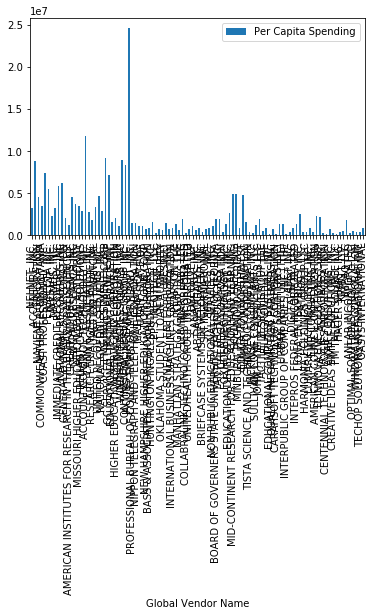

In [30]:
education_vendor_names.plot(kind = "bar", x = "Global Vendor Name", y = "Per Capita Spending", )